A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.2871 - loss: 2.2521 - val_accuracy: 0.4813 - val_loss: 1.4117
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.4460 - loss: 1.5297 - val_accuracy: 0.5170 - val_loss: 1.3310
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.4973 - loss: 1.3936 - val_accuracy: 0.5044 - val_loss: 1.4455
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5233 - loss: 1.3271 - val_accuracy: 0.5909 - val_loss: 1.1579
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5445 - loss: 1.2757 - val_accuracy: 0.6337 - val_loss: 1.0394
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5620 - loss: 1.2279 - val_accuracy: 0.5750 - val_loss: 1.1915
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5825 - loss: 1.1889 - val_accuracy: 0.6519 - val_loss: 1.0021
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5926 - loss: 1.1545 - 

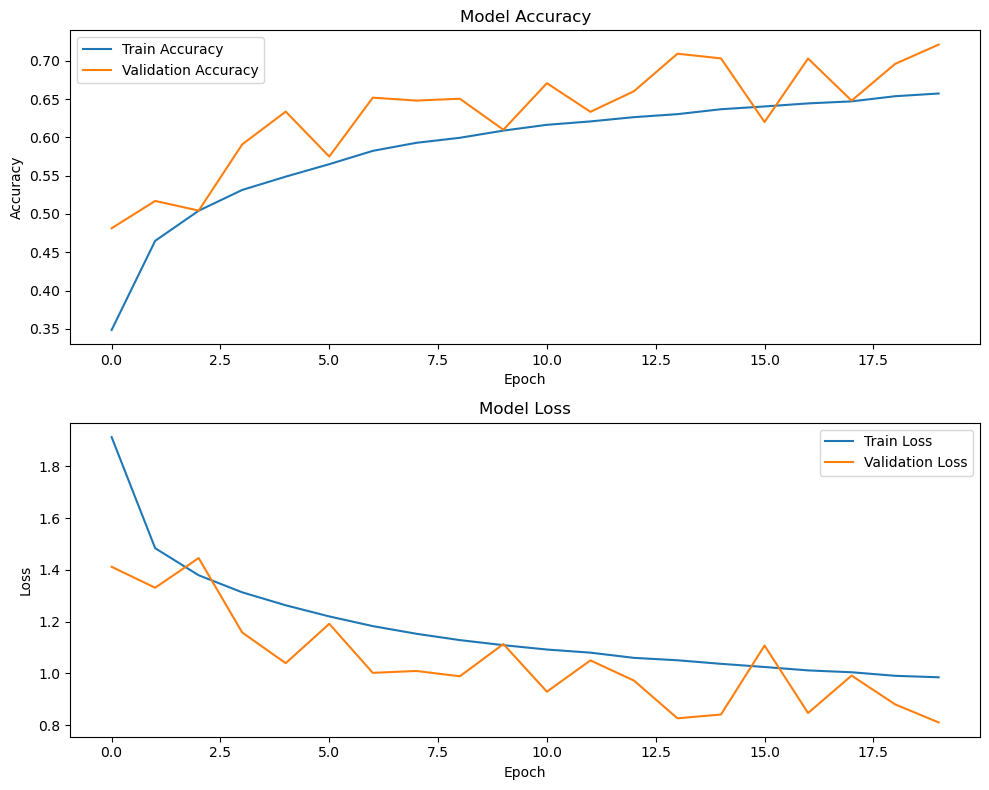

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7174 - loss: 0.8088
Final Test Accuracy: 0.7212


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Load and preprocess dataset (CIFAR-10 for demonstration)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical format
y_train, y_test = keras.utils.to_categorical(y_train, 10), keras.utils.to_categorical(y_test, 10)

# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Build CNN Model
def build_model():
    model = models.Sequential([
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile Model
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Plot Accuracy & Loss
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Accuracy Graph
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend()

# Loss Graph
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()

plt.tight_layout()
plt.show()

# Evaluate Model
final_loss, final_acc = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {final_acc:.4f}")
